<a href="https://colab.research.google.com/github/shakyarujan/Deep-Learning-with-PyTorch/blob/master/Text_Identification_With_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
### Import Important Packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import pandas as pd
import helper
import matplotlib.pyplot as plt

# Constructing the NN without using torch.nn.functional
from torch import nn
# Import the optimizer to update the weights of the gradients.
from torch import optim 

In [2]:
### Import MNIST datasets provided by the torchvision package

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the Traning datasets 
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


In [0]:
# Iterate the trainloader
# detaiter = iter(trainloader)
# images, labels = detaiter.next()
images, labels = next(iter(trainloader))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


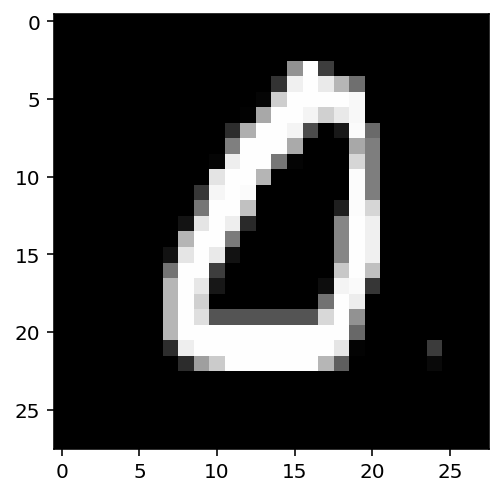

In [0]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
# Activation Function
def activation(x):
  return 1/(1+torch.exp(-x))

# Flatter the 2D images into 1D images
inputs = images.view(images.shape[0], -1)

# Create Parmater
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

# Define Bias
w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2

In [0]:
print(out.shape)

torch.Size([64, 10])


In [0]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)


print(probabilities.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
# Constructing the NN with torch.nn.functoional
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
  # Inputs to hidden layer
    self.hidden = nn.Linear(784, 256)
  # Hidden to output layer
    self.output = nn.Linear(256, 10)
  
  def forward(self, x):
    
    # Hidden layer with sigmoid activation
    x = F.sigmoid(self.hidden(x))
    # Output layer with softmax function
    x = F.softmax(self.output(x), dim=1)

    return x 

In [0]:
# Constructing the Multi Neural Network with Relu function (784, 128, 64 ,10)

class MultiNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    # For hidden layer
    self.hidden_first = nn.Linear(784, 128)
    self.hidden_second = nn.Linear(128, 64)
    # For output layer
    self.output = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.hidden_first(self.hidden_second(x)))
    x = F.log_softmax(self.output(x), dim=1)

    criterion = nn.CrossEntropyLoss(x)
    return criterion

   

In [0]:
# Build a feedforward network
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10))

criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)

loss = criterion(logits, labels)

print(loss)

tensor(2.3200, grad_fn=<NllLossBackward>)


In [0]:
# Constructing the NN without using torch.nn.functional with softmax and log_softmax
# Build a feedforward network
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10), nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)

loss = criterion(logps, labels)
print(loss)

print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

tensor(2.2917, grad_fn=<NllLossBackward>)
Before backward pass: 
 None
After backward pass: 
 tensor([[-4.2921e-04, -4.2921e-04, -4.2921e-04,  ..., -4.2921e-04,
         -4.2921e-04, -4.2921e-04],
        [ 1.9281e-03,  1.9281e-03,  1.9281e-03,  ...,  1.9281e-03,
          1.9281e-03,  1.9281e-03],
        [-3.2424e-03, -3.2424e-03, -3.2424e-03,  ..., -3.2424e-03,
         -3.2424e-03, -3.2424e-03],
        ...,
        [ 5.0987e-04,  5.0987e-04,  5.0987e-04,  ...,  5.0987e-04,
          5.0987e-04,  5.0987e-04],
        [ 7.8661e-05,  7.8661e-05,  7.8661e-05,  ...,  7.8661e-05,
          7.8661e-05,  7.8661e-05],
        [ 1.0650e-04,  1.0650e-04,  1.0650e-04,  ...,  1.0650e-04,
          1.0650e-04,  1.0650e-04]])


In [7]:
# Constructing the NN without using torch.nn.functional with softmax and log_softmax and Optimizer 

# Build a feedforward network
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10), nn.LogSoftmax(dim=1))

optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)

loss = criterion(logps, labels)
print(loss)

print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

print('Initial Weights: \n', model[0].weight)
images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because the gradients are accumulated
optimizer.zero_grad()

# Forward pass, backward pass, then update the weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradients: -', model[0].weight.grad)

tensor(2.2882, grad_fn=<NllLossBackward>)
Before backward pass: 
 None
After backward pass: 
 tensor([[-7.4826e-05, -7.4826e-05, -7.4826e-05,  ..., -7.4826e-05,
         -7.4826e-05, -7.4826e-05],
        [-1.0263e-03, -1.0263e-03, -1.0263e-03,  ..., -1.0263e-03,
         -1.0263e-03, -1.0263e-03],
        [-3.4636e-04, -3.4636e-04, -3.4636e-04,  ..., -3.4636e-04,
         -3.4636e-04, -3.4636e-04],
        ...,
        [ 8.5924e-05,  8.5924e-05,  8.5924e-05,  ...,  8.5924e-05,
          8.5924e-05,  8.5924e-05],
        [ 4.6828e-04,  4.6828e-04,  4.6828e-04,  ...,  4.6828e-04,
          4.6828e-04,  4.6828e-04],
        [ 2.4251e-03,  2.4251e-03,  2.4251e-03,  ...,  2.4251e-03,
          2.4251e-03,  2.4251e-03]])
Initial Weights: 
 Parameter containing:
tensor([[-0.0125, -0.0267, -0.0292,  ..., -0.0287, -0.0241,  0.0119],
        [-0.0218, -0.0281,  0.0267,  ..., -0.0011, -0.0173,  0.0203],
        [-0.0319, -0.0176, -0.0303,  ...,  0.0308,  0.0165,  0.0284],
        ...,
        [-

In [9]:
# Make an update steps and few the new weights
optimizer.step()
print('Update weights - ', model[0].weight)

Update weights -  Parameter containing:
tensor([[-0.0126, -0.0268, -0.0293,  ..., -0.0288, -0.0242,  0.0118],
        [-0.0218, -0.0282,  0.0266,  ..., -0.0011, -0.0173,  0.0202],
        [-0.0319, -0.0176, -0.0303,  ...,  0.0308,  0.0165,  0.0284],
        ...,
        [-0.0103, -0.0023,  0.0039,  ...,  0.0270, -0.0289,  0.0082],
        [ 0.0182, -0.0038, -0.0312,  ..., -0.0121,  0.0153, -0.0266],
        [-0.0289,  0.0063,  0.0267,  ...,  0.0271, -0.0350, -0.0176]],
       requires_grad=True)


In [14]:
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10), nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs=5
for e in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    images = images.view(images.shape[0], -1)

    # Clear the gradients, do this because the gradients are accumulated
    optimizer.zero_grad()

    # Forward pass, backward pass, then update the weights
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item() 
  else:
    print(f"Training Loss: {running_loss/len(trainloader)}") 


Training Loss: 1.8347029978278349
Training Loss: 0.789647580114509
Training Loss: 0.5122980541988477
Training Loss: 0.42710530216188064
Training Loss: 0.3846284833067516


In [18]:
# Defining the class view_classify that shows the classification of the train model which detect the text images
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

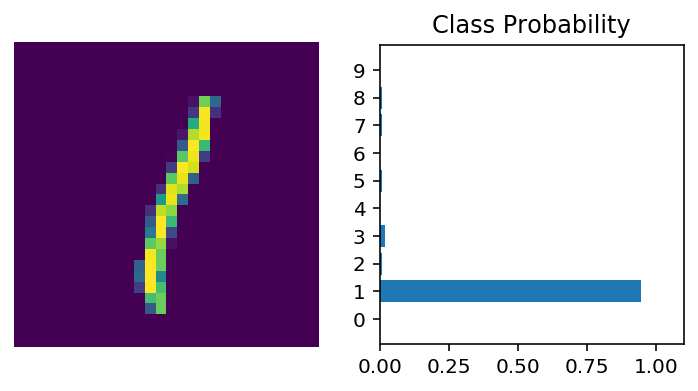

In [26]:
%matplotlib inline
import helper
import torch.nn.functional as F

images, labels = next(iter(trainloader))
img = images[9].view(1, 784)

# running with no gradient to make it faster
with torch.no_grad():
  logits = model.forward(img)


ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), ps)
